In [16]:
import os

labs = True

if labs:
    # Define path to CAMCAN DWI, atlas, and SC
    human_dwi = "/media/hsa22/Expansion/CAMCAN/CC110037/reconstruction/t1_and_Fivett_reg/CC110037_b0.nii.gz"
    human_atlas = "/media/hsa22/Expansion/CAMCAN/Schaefer_Lausanne/schaefer_atlas_registered_Warped_integer.nii.gz"
    human_connectivity = "/media/hsa22/Expansion/CAMCAN/Schaefer_Lausanne/schaefer232_connectivity.csv"

    # Define path to Marmoset DWI, atlas, and SC
    marmoset_dwi = "/media/hsa22/Expansion/Brain-MINDS/model_data_w_resize/dMRI_b0/A6DR-R01_0083-TT56/DWI_concatenated_b0.nii.gz"
    marmoset_atlas = "/media/hsa22/Expansion/Brain-MINDS/BMCR_STPT_template/Atlases/MBM_mapped/MBM_cortex_vM_80um_TC_std.nii.gz"
    marmoset_connectivity = "/media/hsa22/Expansion/deeplearning_test/test/test/brain_A6Vb-R01_0104-TT72/regression_points_directions/batch_0/optimized_MBM.csv"

#### **Nilearn Plotting**

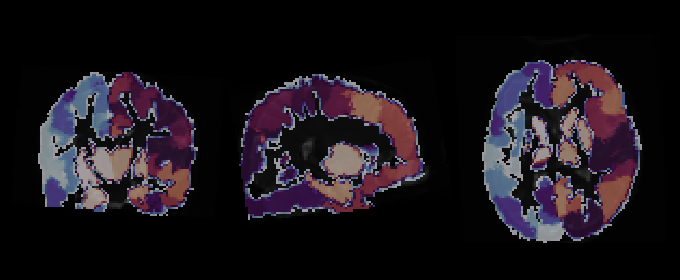

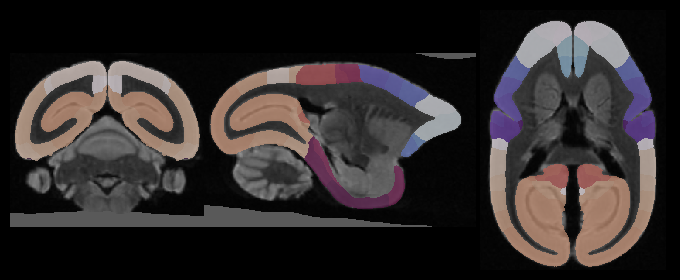

In [38]:
from nilearn import plotting
# Plot atlas on DWI
plotting.plot_roi(human_atlas, bg_img=human_dwi, 
                  draw_cross=False, cmap="twilight", annotate=False)
plotting.plot_roi(marmoset_atlas, bg_img=marmoset_dwi,
                  draw_cross=False, cmap="twilight", annotate=False)

#### **Loading connectome**

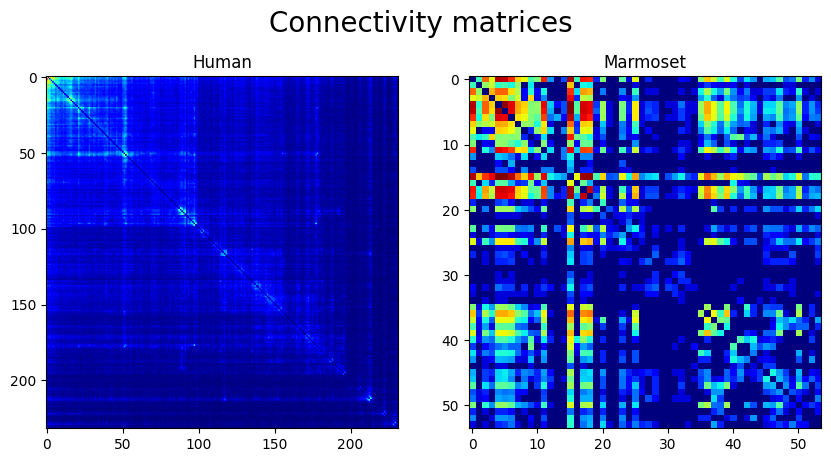

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Load connectivity matrices
human_connectome = np.loadtxt(human_connectivity, delimiter=",")
marmoset_connectome = np.loadtxt(marmoset_connectivity, delimiter=",")

# Log transform connectivity matrices
marmoset_connectome = np.log(marmoset_connectome + 1)

# Plot connectivity matrices
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(human_connectome, cmap="jet")
ax[0].set_title("Human")
ax[1].imshow(marmoset_connectome, cmap="jet")
ax[1].set_title("Marmoset")
fig.suptitle("Connectivity matrices", fontsize=20)
plt.show()

#### **Graph Making**

In [31]:
import networkx as nx

# Function to create a graph for every connectome and remove self-loops
def create_graph(connectome):

    # Create a graph
    graph = nx.Graph(connectome)

    # Label the edges
    for u, v in graph.edges():
        graph[u][v]['label'] = f"{u}-{v}"
    
    # Remove self-loops
    graph.remove_edges_from(nx.selfloop_edges(graph))


    # Return the dictionary
    return graph

# Create a dictionary of graphs
human_graph = create_graph(human_connectome)    
marmoset_graph = create_graph(marmoset_connectome)

print("Number of nodes in human graph: {}".format(len(human_graph.nodes())))
print("Number of nodes in marmoset graph: {}".format(len(marmoset_graph.nodes())))

Number of nodes in human graph: 232
Number of nodes in marmoset graph: 54


In [32]:
import pandas as pd

def graph_to_edge_df(G):
    edges = []
    for u, v, data in G.edges(data=True):
        edge_label = data['label']
        weight = data.get('weight', 1)  # Default weight is set to 1
        
        edge_data = {'source': u, 'target': v, 'label': edge_label, 'weight': weight}
        edges.append(edge_data)

    return pd.DataFrame(edges)

human_df = graph_to_edge_df(human_graph)
marmoset_df = graph_to_edge_df(marmoset_graph)

print(human_df.head())
print(marmoset_df.head())


   source  target label  weight
0       0       1   0-1  8336.0
1       0       2   0-2  8762.0
2       0       3   0-3  6836.0
3       0       4   0-4  6074.0
4       0       5   0-5  6487.0
   source  target label    weight
0       0       1   0-1  3.688879
1       0       2   0-2  7.091742
2       0       3   0-3  5.521461
3       0       4   0-4  8.390041
4       0       5   0-5  8.331105


In [37]:
from d3blocks import D3Blocks

# Sample the human df
marmoset_df = marmoset_df.sample(50)

# Create a D3Blocks object
d3 = D3Blocks(chart="Chord", frame=False)

# Add the dataframe
d3.set_node_properties(marmoset_df, cmap="twilight", opacity=1)
d3.set_edge_properties(marmoset_df, cmap="twilight", opacity=1)

# Display the chart
d3.chord(marmoset_df, cmap="twilight", opacity=1, title="Human connectome", fontsize=20)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
/vol/bitbucket/hsa22/miniconda3/envs/diss/lib/python3.11/site-packages/d3blocks/utils.py:551: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if 'weight' in X.columns: X['weight'] = X['weight'].astype(float)
[d3blocks] >INFO> Convert to Dictionary.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
/vol/bitbucket/hsa22/miniconda3/envs/dis

In [34]:
from d3blocks import D3Blocks

# Make a list of both the dataframes
dataframes = [human_df, marmoset_df]

for frame in dataframes:

    # Sample the dataframe
    sampled_df = human_df.sample(50, random_state=42)

    # Create a D3Blocks object
    d3 = D3Blocks(chart="Chord", frame=False)

    # Add the dataframe
    d3.set_node_properties(sampled_df, cmap="twilight", opacity=1)
    d3.set_edge_properties(sampled_df, cmap="twilight", opacity=1)

    # Display the chart
    d3.chord(sampled_df, cmap="twilight", opacity=1)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
/vol/bitbucket/hsa22/miniconda3/envs/diss/lib/python3.11/site-packages/d3blocks/utils.py:551: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if 'weight' in X.columns: X['weight'] = X['weight'].astype(float)
[d3blocks] >INFO> Convert to Dictionary.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
/vol/bitbucket/hsa22/miniconda3/envs/dis